Q2. Radial Basis Function Neural Network with Gaussian kernal Function with constant spread function using all the points in the input as a centre of the Radial Basis Function

Radial Basis Function consists of three layers. 
- Input Layer
- Hidden Layer
- Output Layer

For RBF NN we will be having only one hidden layer unlike MLP
and another characteristics of RBF NN is weights between the inputs and hidden layer are unity.



Importing the Required Libraries 

In [1]:
import numpy as np
from numpy.linalg import norm, pinv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Creating a Input and Output sample based on the given conditions.

#### Input Sample Creation

 Given that 
 
            x1 = -2 + 0.2*xi
            x2 = -2 + 0.2*xj
            
 - X1 and X2 are considered as the inputs 
 - the value i and j are randomly sampled within the range (0 to 20)
 - X1 and X2 are appened and converted into array for further processing
 
#### Output Sample Creation

Given that 

            (x1*x1 + x2*x2) <= 1)
            
- If this condition satisfied output sample is appened as 1 else -1 is appened
- With this way we created the output sample
            
 

In [2]:
input_sample = []
output_sample = []

for itr in range (441):
    xi = np.random.randint(0,21)
    xj = np.random.randint(0,21)
    
    x1 = -2 + 0.2*xi
    x2 = -2 + 0.2*xj
    
    if ((x1*x1 + x2*x2) <= 1):
        output_sample.append(1)
    else:
        output_sample.append(-1)
        
    input_sample.append([x1,x2])
    
input_sample = np.array(input_sample)
output_sample = np.array(output_sample)

Finding out the length of the input sample

In [3]:
len(input_sample)

441

Finding out the length of the output sample

In [4]:
len(output_sample)

441

#### Train Test Split
- Splitting the Input sample and Output sample into Train / Test for model training and testing
- Train Data is splitted into 80% of total data  so 352 data for Training for both input and output
- Test Data is splitted into 20 % of total data  so 89 data for Testing for both input and output

In [5]:
train_ip, test_ip, train_op, test_op = train_test_split(input_sample, output_sample, test_size= 0.2)

In [6]:
print('Train_Input: ',len(train_ip))
print('Test_Input: ',len(test_ip))
print('Train_Output: ',len(train_op))
print('Test_Output: ',len(test_op))

Train_Input:  352
Test_Input:  89
Train_Output:  352
Test_Output:  89


Once the Data preprocessing and train / test split are completed
we have to proceed in finding the Gaussian Kernal Function.

There are two parameters in Gaussian Kernal Function.
1. Centers 
2. Sigma - Which is the Spread Function

- First step is to find the Gaussian Kernal Function for all neurons with this two parameters.
- Input training set is the center 
- Sigma is constant for all kernal
- To compare the results we set the range of some sigma values from 0 to 10.

Now, both the center and sigma is known and fixed, we worked directly on finding Gaussian Kernal Function.



#### Distance Function
Find out the distance of inputs and center for Gaussian Kernal Function using Eucledian Norm

In [7]:
def distance(inputs, center):
    dist = np.linalg.norm(inputs - center)** 2
    return dist

#### Gaussian Matrix Computation Function
Computation of Gaussian Matrix with the Centers and Sigma and distance function

In [8]:
def gauss_matrix(inputs, center, sigma):
    gauss = np.zeros((inputs.shape[0], center.shape[0]))
    sig = 2*(sigma ** 2)
    for itr_i, itr_j in enumerate(center):
        for index_i, index_j in enumerate(inputs):
            dist = distance(index_j, itr_j)
            gau = np.exp(-dist/sig)
            gauss[index_i,itr_i] = gau
    return gauss

#### Weight Matrix Calculation Function
- Next step after finding Gaussian kernal function, we have to find out the weight matrix
- Using Pseudo Inverse method, Weight matrix is calculated.

In [9]:
def weight_mat_cal(inputs, center, sigma, matrix):
    gauss_mat = gauss_matrix(inputs, center, sigma)
    gauss_inverse = np.linalg.pinv(gauss_mat)
    weight_matrix = np.dot(gauss_inverse, matrix)
    return weight_matrix

#### Output Matrix Calculation Function
- Output Matrix is calculated by the element wise multiplication of Gaussian Matrix and Weight Matrix

In [10]:
def output_mat_cal(test_input, centers, sigma, weight_matrix):
    gauss_test_matrix = gauss_matrix(test_input,centers, sigma)
    output_matrix = np.dot(gauss_test_matrix, weight_matrix)
    return output_matrix

#### Mean Square Error Calculation Function
- Mean Square Error is calculated for the plots and analysis

In [11]:
def mean_square_error(y_true, y_pred):
    return np.mean((y_true - y_pred) **2)

#### Accuracy Calculation Function
- Accuracy is calculated for the plots and Analysis

In [12]:
def accuracy_calculation(y_true, y_pred):
    return np.mean(y_true == y_pred)


#### Training and Testing Model
- Once we prepared all the functions for the model, we can train and test the model with the various sigma values
- As mentioned in the question, various sigma values are passed to get the performance of the RBF NN model
- For the each sigma values we calculated Train and Test Accuracy

In [13]:
sigma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
mean_sq_error = []
accuracy_train = []
accuracy_test = []

for sig in sigma:
    weights = weight_mat_cal(train_ip, train_ip, sig, train_op)
    
    output_mat_train = output_mat_cal(train_ip, train_ip, sig, weights)
    output_pred_train = np.sign(output_mat_train)
    
    output_mat_test = output_mat_cal(test_ip, train_ip, sig, weights)
    output_pred_test = np.sign(output_mat_test)
    
    mean_error = mean_square_error(test_op, output_pred_test)
    mean_sq_error.append(mean_error)
    
    acc_train = accuracy_calculation(train_op, output_pred_train)
    accuracy_train.append(acc_train)
    
    acc_test = accuracy_calculation(test_op, output_pred_test)
    accuracy_test.append(acc_test)
    
    print("Sigma : {}     MSE : {}     Train Accuracy : {} %     Test Accuracy : {} %"
          .format(sig, np.round(mean_error,3), np.round(acc_train*100, 5), np.round(acc_test*100, 3)))
    

Sigma : 0.1     MSE : 0.045     Train Accuracy : 100.0 %     Test Accuracy : 98.876 %
Sigma : 0.2     MSE : 0.045     Train Accuracy : 100.0 %     Test Accuracy : 98.876 %
Sigma : 0.3     MSE : 0.045     Train Accuracy : 100.0 %     Test Accuracy : 98.876 %
Sigma : 0.4     MSE : 0.225     Train Accuracy : 100.0 %     Test Accuracy : 94.382 %
Sigma : 0.5     MSE : 0.404     Train Accuracy : 100.0 %     Test Accuracy : 89.888 %
Sigma : 0.6     MSE : 0.584     Train Accuracy : 100.0 %     Test Accuracy : 85.393 %
Sigma : 0.7     MSE : 0.584     Train Accuracy : 100.0 %     Test Accuracy : 85.393 %
Sigma : 0.8     MSE : 0.36     Train Accuracy : 100.0 %     Test Accuracy : 91.011 %
Sigma : 0.9     MSE : 0.539     Train Accuracy : 100.0 %     Test Accuracy : 86.517 %
Sigma : 1     MSE : 0.225     Train Accuracy : 100.0 %     Test Accuracy : 94.382 %
Sigma : 2     MSE : 0.101     Train Accuracy : 98.86364 %     Test Accuracy : 96.629 %
Sigma : 3     MSE : 0.18     Train Accuracy : 98.29545 %

#### Plotting the Graph for the Sigma VS MSE

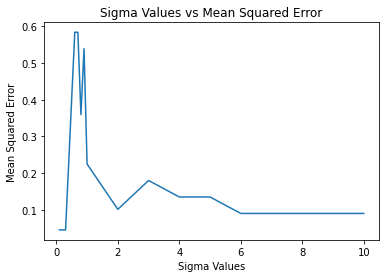

In [14]:
plt.plot(sigma,mean_sq_error)
plt.title('Sigma Values vs Mean Squared Error')
plt.xlabel('Sigma Values')
plt.ylabel('Mean Squared Error')
plt.show()

#### Plotting the Graph for Sigma VS Train Accuracy

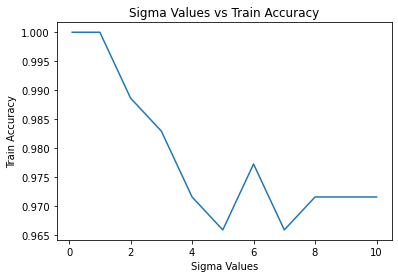

In [15]:
plt.plot(sigma,accuracy_train)
plt.title('Sigma Values vs Train Accuracy')
plt.xlabel('Sigma Values')
plt.ylabel('Train Accuracy')
plt.show()

#### Plotting the Graph for Sigma VS Test Accuracy

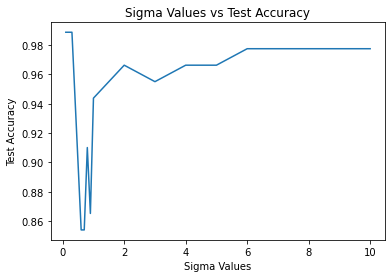

In [16]:
plt.plot(sigma,accuracy_test)
plt.title('Sigma Values vs Test Accuracy')
plt.xlabel('Sigma Values')
plt.ylabel('Test Accuracy')
plt.show()

The graph comparing sigma values with train accuracy shows that the accuracy remains consistently high (around 100%) for sigma values ranging from 0 to 1. However, after reaching a peak, the accuracy starts to decrease with fluctuations until reaching a point around sigma 7. Beyond sigma 7, the accuracy becomes relatively constant.

Similarly, the graph comparing sigma values with test accuracy reveals that accuracy is around 99% for sigma values 0.1 and 0.2. From sigma 0.2 to sigma 7, the test accuracy fluctuates between 95% and 97%. After sigma 7, the accuracy becomes constant, similar to the train accuracy graph.

From these observations, we can give some notes:
- After sigma 7, the accuracy becomes constant for both train and test accuracy.
- The highest accuracy is achieved for sigma values between 0 and 1, reaching approximately 99%. After sigma 2, the accuracy starts to stabilize at a reasonable level.
- When sigma is too small, the radial basis functions become narrow, leading to overfitting. The network becomes too sensitive to the training data, resulting in high train accuracy
- When we increase the spread, the network saturates.
- As a result of the above evaluation, I have decided on a mid-range sigma value of 5 with an  Train accuracy and Test accuracy of 98.8% as best width value.


#### 2 a) Randomly select the centers from the input data.

- Given that we have to use 150 centers, that we generated from the input samples
- Rest of all the procedures are same

In [17]:
random_extract = np.random.choice(input_sample.shape[0], size = 150, replace = False)
random_150_cen = input_sample[random_extract,:]

sigma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
# sigma = [1,2]
mean_sq_error_150c = []
accuracy_train_150c = []
accuracy_test_150c = []

for sig in sigma:
    weights = weight_mat_cal(train_ip, random_150_cen, sig, train_op)
    
    output_mat_test = output_mat_cal(test_ip, random_150_cen, sig, weights)
    output_pred_test = np.sign(output_mat_test)
    
    output_mat_train = output_mat_cal(train_ip, random_150_cen, sig, weights)
    output_pred_train = np.sign(output_mat_train)
    
    
    mean_error = mean_square_error(test_op, output_pred_test)
    mean_sq_error_150c.append(mean_error)
    
    
    acc_train = accuracy_calculation(train_op, output_pred_train)
    accuracy_train_150c.append(acc_train)
    
    acc_test = accuracy_calculation(test_op, output_pred_test)
    accuracy_test_150c.append(acc_test)
    
    print("Sigma : {}     MSE : {}     Train Accuracy : {} %     Test Accuracy : {} %"
          .format(sig, np.round(mean_error,3), np.round(acc_train*100, 5), np.round(acc_test*100, 3)))
    

Sigma : 0.1     MSE : 0.449     Train Accuracy : 97.44318 %     Test Accuracy : 88.764 %
Sigma : 0.2     MSE : 0.135     Train Accuracy : 99.43182 %     Test Accuracy : 96.629 %
Sigma : 0.3     MSE : 0.045     Train Accuracy : 100.0 %     Test Accuracy : 98.876 %
Sigma : 0.4     MSE : 0.09     Train Accuracy : 100.0 %     Test Accuracy : 97.753 %
Sigma : 0.5     MSE : 0.09     Train Accuracy : 100.0 %     Test Accuracy : 97.753 %
Sigma : 0.6     MSE : 0.27     Train Accuracy : 100.0 %     Test Accuracy : 93.258 %
Sigma : 0.7     MSE : 0.27     Train Accuracy : 100.0 %     Test Accuracy : 93.258 %
Sigma : 0.8     MSE : 0.27     Train Accuracy : 100.0 %     Test Accuracy : 93.258 %
Sigma : 0.9     MSE : 0.18     Train Accuracy : 100.0 %     Test Accuracy : 95.506 %
Sigma : 1     MSE : 0.18     Train Accuracy : 100.0 %     Test Accuracy : 95.506 %
Sigma : 2     MSE : 0.135     Train Accuracy : 98.57955 %     Test Accuracy : 96.629 %
Sigma : 3     MSE : 0.18     Train Accuracy : 98.29545 %

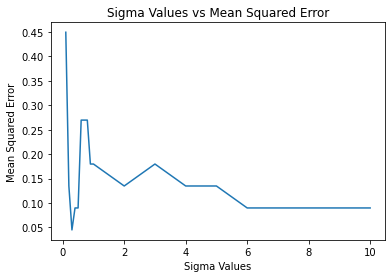

In [18]:
plt.plot(sigma,mean_sq_error_150c)
plt.title('Sigma Values vs Mean Squared Error')
plt.xlabel('Sigma Values')
plt.ylabel('Mean Squared Error')
plt.show()

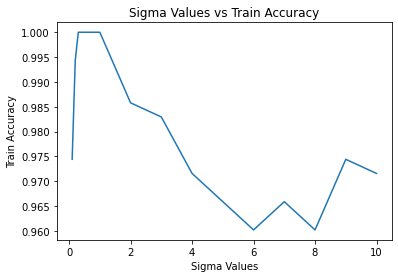

In [19]:
plt.plot(sigma,accuracy_train_150c)
plt.title('Sigma Values vs Train Accuracy')
plt.xlabel('Sigma Values')
plt.ylabel('Train Accuracy')
plt.show()

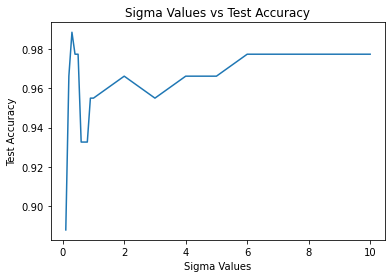

In [20]:
plt.plot(sigma,accuracy_test_150c)
plt.title('Sigma Values vs Test Accuracy')
plt.xlabel('Sigma Values')
plt.ylabel('Test Accuracy')
plt.show()

This is the output for the 150 centers randomly sampled from the input data

#### b) Use K-Means algorithm to find the centers.
#### Design Summary : 
- Here we compute 150 centres using kmeans clustering.
- Sigma values are ranging from 0.01 to 10.



Importing KMeans from the scikit library

- The K-means algorithm is an iterative process used to divide a dataset into K distinct clusters. 
- Each data point is assigned to a single cluster, aiming to minimize the sum of squared distances between the data points and their respective cluster centroids

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=150, random_state=0).fit(train_ip)
kmeans_centers = kmeans.cluster_centers_

sigma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
# sigma = [1,2]
mean_sq_error_km = []
accuracy_train_km = []
accuracy_test_km = []

for sig in sigma:
    weights = weight_mat_cal(train_ip, kmeans_centers, sig, train_op)
    
    output_mat_test = output_mat_cal(test_ip, kmeans_centers, sig, weights)
    output_pred_test = np.sign(output_mat_test)
    
    output_mat_train = output_mat_cal(train_ip, kmeans_centers, sig, weights)
    output_pred_train = np.sign(output_mat_train)
    
    
    mean_error = mean_square_error(test_op, output_pred_test)
    mean_sq_error_km.append(mean_error)
    
    
    acc_train = accuracy_calculation(train_op, output_pred_train)
    accuracy_train_km.append(acc_train)
    
    acc_test = accuracy_calculation(test_op, output_pred_test)
    accuracy_test_km.append(acc_test)
    
    print("Sigma : {}     MSE : {}     Train Accuracy : {} %     Test Accuracy : {} %"
          .format(sig, np.round(mean_error,3), np.round(acc_train*100, 5), np.round(acc_test*100, 3)))
    

Sigma : 0.1     MSE : 0.09     Train Accuracy : 98.29545 %     Test Accuracy : 97.753 %
Sigma : 0.2     MSE : 0.045     Train Accuracy : 99.71591 %     Test Accuracy : 98.876 %
Sigma : 0.3     MSE : 0.045     Train Accuracy : 100.0 %     Test Accuracy : 98.876 %
Sigma : 0.4     MSE : 0.135     Train Accuracy : 100.0 %     Test Accuracy : 96.629 %
Sigma : 0.5     MSE : 0.135     Train Accuracy : 100.0 %     Test Accuracy : 96.629 %
Sigma : 0.6     MSE : 0.09     Train Accuracy : 100.0 %     Test Accuracy : 97.753 %
Sigma : 0.7     MSE : 0.045     Train Accuracy : 100.0 %     Test Accuracy : 98.876 %
Sigma : 0.8     MSE : 0.18     Train Accuracy : 100.0 %     Test Accuracy : 95.506 %
Sigma : 0.9     MSE : 0.225     Train Accuracy : 100.0 %     Test Accuracy : 94.382 %
Sigma : 1     MSE : 0.225     Train Accuracy : 100.0 %     Test Accuracy : 94.382 %
Sigma : 2     MSE : 0.135     Train Accuracy : 98.86364 %     Test Accuracy : 96.629 %
Sigma : 3     MSE : 0.18     Train Accuracy : 98.295

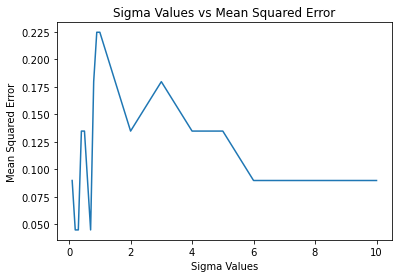

In [23]:
plt.plot(sigma,mean_sq_error_km)
plt.title('Sigma Values vs Mean Squared Error')
plt.xlabel('Sigma Values')
plt.ylabel('Mean Squared Error')
plt.show()

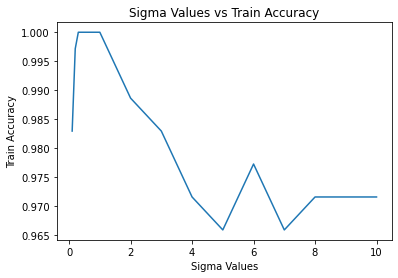

In [24]:
plt.plot(sigma,accuracy_train_km)
plt.title('Sigma Values vs Train Accuracy')
plt.xlabel('Sigma Values')
plt.ylabel('Train Accuracy')
plt.show()

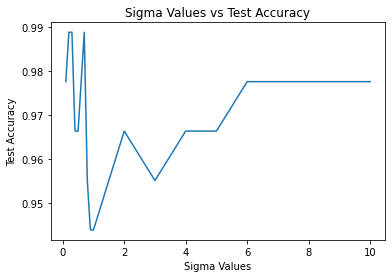

In [25]:
plt.plot(sigma,accuracy_test_km)
plt.title('Sigma Values vs Test Accuracy')
plt.xlabel('Sigma Values')
plt.ylabel('Test Accuracy')
plt.show()

This is the output for the 150 centers using K Means Algorithm

#### Comparison for Train and Test Accuracies of  all three conditions

#### Comparison of Train Accuracy for all three conditions

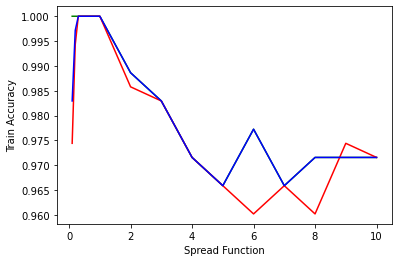

In [26]:
plt.subplot(1,1,1)
plt.plot(sigma, accuracy_train, color = 'green')
plt.plot(sigma, accuracy_train_150c, color = 'red')
plt.plot(sigma, accuracy_train_km, color = 'blue')
plt.xlabel("Spread Function")
plt.ylabel("Train Accuracy")
plt.show()

In the case of Train Accuracies, untill spread function 3, there were a flutuations after that it became constant at 98% of accuracy.

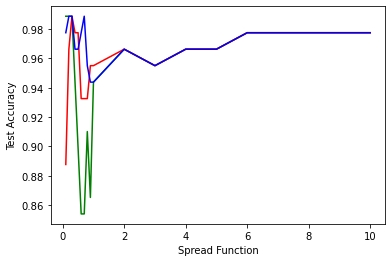

In [27]:
plt.subplot(1,1,1)
plt.plot(sigma, accuracy_test, color = 'green')
plt.plot(sigma, accuracy_test_150c, color = 'red')
plt.plot(sigma, accuracy_test_km, color = 'blue')
plt.xlabel("Spread Function")
plt.ylabel("Test Accuracy")
plt.show()

#### Final Inference for Test Accuracy

- The accuracy of the RBF (Radial Basis Function) neural network exhibits significant fluctuations within the range of spread function values from 0 to 2, indicating inconsistency. 
- This inconsistency could be attributed to the sensitivity of the RBF network to changes in the spread function.
- As the spread function values increase from 3 to 7, the accuracies stabilize and remain relatively constant at around 97% to 98%.
- This occurs because the network has found an optimal balance between capturing the patterns in the data and generalizing to unseen samples within this range of spread function values.
- However, as the spread function continues to increase beyond this optimal range, the accuracies start to saturate. 
- This saturation happens because the RBF network becomes overfitted to the training data and loses its ability to generalize to new data points. 